In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset**

In [ ]:
df=pd.read_csv('fitness.csv')

**Display first five rows of dataframe**

In [ ]:
df.head()

,User_ID,Full Name,Date,Age,Gender,Height (cm),Weight (kg),Steps_Taken,Calories_Burned,Hours_Slept,Water_Intake (Liters),Active_Minutes,Heart_Rate (bpm),Workout_Type,Stress_Level (1-10),Mood
0,1,Sara Martinez,2023-01-01 00:00:00,19,Female,191,80,11405,1862,7.021201,3.440508,80.0,84.0,Yoga,2,Happy
1,1,Sara Martinez,2023-01-02 00:00:00,19,Female,191,80,7010,1806,NaN,3.103590,47.0,72.0,Cardio,9,Neutral
2,1,Sara Martinez,2023-01-03 00:00:00,19,Female,191,80,18942,2274,8.167817,3.814843,46.0,85.0,Yoga,6,Sad
3,1,Sara Martinez,2023-01-04 00:00:00,19,Female,191,80,13778,2656,7.453552,3.508636,105.0,77.0,Yoga,2,Sad
4,1,Sara Martinez,2023-01-05 00:00:00,19,Female,191,80,10247,3571,5.132654,NaN,53.0,61.0,Yoga,8,Sad


Remove unnecessary columns, Rename the columns and checking datatype

In [ ]:
df = df[['User_ID', 'Age', 'Gender', 'Daily_Steps', 'Calories_Burned', 'Workout_Type']]

In [ ]:
df.rename(columns={'Steps_Taken': 'Daily_Steps'}, inplace=True)

In [ ]:
df.dtypes

,0
User_ID,int64
Age,int64
Gender,object
Daily_Steps,int64
Calories_Burned,int64
Workout_Type,object


Convert User_ID to categorical (string/object)

In [ ]:
df['User_ID'] = df['User_ID'].astype(str)

Find distinct (unique) values in Workout_Type

In [ ]:
unique_workouts = df['Workout_Type'].unique()

print("Distinct values in Workout_Type:")
print(unique_workouts)

Distinct values in Workout_Type:
['Yoga' 'Cardio' nan 'Strength']


In [ ]:
# Define order of categories
workout_order = ['Yoga', 'Strength', 'Cardio']

# Convert to ordered categorical variable
df['Workout_Type'] = pd.Categorical(df['Workout_Type'], categories=workout_order, ordered=True)

**1.	Identify the type of variables and measurement scales for each column**

In [ ]:
df.dtypes

,0
User_ID,object
Age,int64
Gender,object
Daily_Steps,int64
Calories_Burned,int64
Workout_Type,category


**2.	Compute descriptive statistics for Daily_Steps and Calories_Burned: mean, median, mode, range, variance, standard deviation, IQR, coefficient of variation (CV), quartiles, percentiles, and 5-number summary.**



Select only the required numeric columns

In [ ]:
cols = ['Daily_Steps', 'Calories_Burned']
data = df[cols]

In [ ]:
mean_values = data.mean()
mean_values

,0
Daily_Steps,11035.111973
Calories_Burned,2747.735452


In [ ]:
median_values=data.median()
median_values

,0
Daily_Steps,11042.0
Calories_Burned,2748.0


In [ ]:
mode_values = data.mode().iloc[0]
mode_values

,0
Daily_Steps,2795.0
Calories_Burned,1672.0


In [ ]:
range_values = data.max() - data.min()
range_values

,0
Daily_Steps,17999
Calories_Burned,2499


In [ ]:
variance_values = data.var()
variance_values

,0
Daily_Steps,2.707400e+07
Calories_Burned,5.239651e+05


In [ ]:
std_values = data.std()
std_values

,0
Daily_Steps,5203.268097
Calories_Burned,723.854309


In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
IQR

,0
Daily_Steps,9038.75
Calories_Burned,1257.00


In [ ]:
CV = (std_values / mean_values) * 100
CV

,0
Daily_Steps,47.151928
Calories_Burned,26.343668


In [ ]:
quartiles = data.quantile([0.25, 0.5, 0.75])
quartiles

,Daily_Steps,Calories_Burned
0.25,6522.75,2119.0
0.50,11042.00,2748.0
0.75,15561.50,3376.0


In [ ]:
percentiles = data.quantile([0.10, 0.25, 0.50, 0.75, 0.90])
percentiles

,Daily_Steps,Calories_Burned
0.10,3798.00,1745.0
0.25,6522.75,2119.0
0.50,11042.00,2748.0
0.75,15561.50,3376.0
0.90,18239.10,3747.0


In [ ]:
five_number = {
    'Minimum': data.min(),
    'Q1': Q1,
    'Median': data.median(),
    'Q3': Q3,
    'Maximum': data.max()
}
five_number_df = pd.DataFrame(five_number)
five_number_df

,Minimum,Q1,Median,Q3,Maximum
Daily_Steps,2000,6522.75,11042.0,15561.5,19999
Calories_Burned,1500,2119.00,2748.0,3376.0,3999


**3.	Visualize the data using boxplots and interpret whether the data is skewed.**

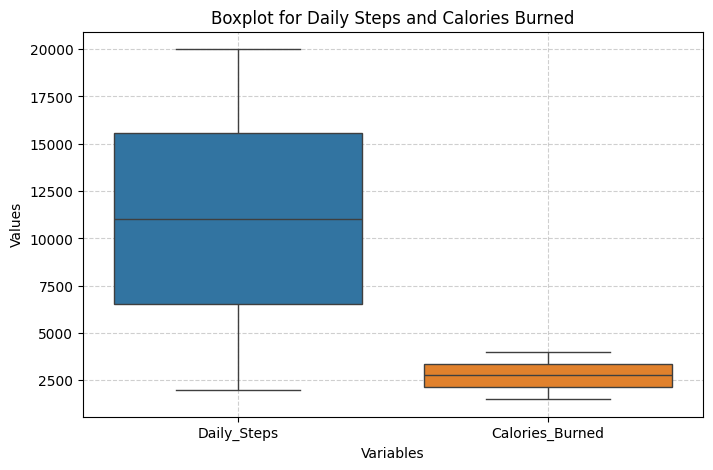

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data)
plt.title("Boxplot for Daily Steps and Calories Burned")
plt.xlabel("Variables")
plt.ylabel("Values")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
skew_values = data.skew()
skew_values

,0
Daily_Steps,-0.007164
Calories_Burned,-0.000267


In [ ]:
for col, skew in skew_values.items():
    if skew > 0.5:
        interpretation = "Right-skewed (Positive Skew)"
    elif skew < -0.5:
        interpretation = "Left-skewed (Negative Skew)"
    else:
        interpretation = "Approximately Symmetrical"
    print(f"{col}: {interpretation}")

Daily_Steps: Approximately Symmetrical
Calories_Burned: Approximately Symmetrical


**4.	Calculate and interpret the covariance and correlation between Daily_Steps and Calories_Burned. Which measure gives more meaningful insights?**

In [ ]:
cov_matrix = data.cov()
cov_matrix

,Daily_Steps,Calories_Burned
Daily_Steps,2.707400e+07,24955.231409
Calories_Burned,2.495523e+04,523965.061112


In [ ]:
corr_matrix = data.corr()
corr_matrix

,Daily_Steps,Calories_Burned
Daily_Steps,1.000000,0.006626
Calories_Burned,0.006626,1.000000


Extract specific covariance & correlation values

In [ ]:
cov_value = cov_matrix.loc['Daily_Steps', 'Calories_Burned']
cov_value

np.float64(24955.231409283857)

In [ ]:
corr_value = corr_matrix.loc['Daily_Steps', 'Calories_Burned']
corr_value

np.float64(0.006625737621317646)

In [ ]:
if corr_value > 0.7:
    meaning = "Strong positive correlation (steps increase, calories burned also increase)"
elif corr_value > 0.3:
    meaning = "Moderate positive correlation (relation between steps and calories burned)"
elif corr_value > 0:
    meaning = "Weak positive correlation (small upward trend)"
elif corr_value < -0.3:
    meaning = "Negative correlation (steps increase, calories burned decrease)"
else:
    meaning = "Very weak or no correlation."

print("Interpretation:", meaning)

Interpretation: Weak positive correlation (small upward trend)


**Correlation:** The correlation coefficient is more meaningful it tells us how strongly and in what direction Daily Steps and Calories Burned move together.

**5.	Draw an inference: Based on a random sample of 500 users, test if the average daily steps of the population are greater than 10,000 (state null and alternative hypotheses, test type, and conclusion).**

In [ ]:
import scipy.stats as stats

In [ ]:
x_bar = mean_values['Daily_Steps']
s = std_values['Daily_Steps']

n = 500
mu_0 = 10000
alpha = 0.05

Step 1: Calcualte Test statistic (t-value)

Step 2: Calculate One-tailed p-value

Step 3: Make Decision


In [ ]:
t_stat = (x_bar - mu_0) / (s / (n ** 0.5))

p_value = 1 - stats.t.cdf(t_stat, df=n-1)

if p_value < alpha:
    decision = "Reject H0"
    conclusion = "There is significant evidence that the population mean daily steps are greater than 10,000 using One-sample t-test"
else:
    decision = "Fail to Reject H0"
    conclusion = "There is not enough evidence to conclude that the population mean daily steps are greater than 10,000 using One-sample t-test"

In [ ]:
print("One-Sample t-Test for Daily Steps > 10,000")
print("-------------------------------------------")
print(f"Sample Mean (x̄): {x_bar:.2f}")
print(f"Sample SD (s): {s:.2f}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Decision: {decision}")
print(f"Conclusion: {conclusion}")

One-Sample t-Test for Daily Steps > 10,000
-------------------------------------------
Sample Mean (x̄): 11035.11
Sample SD (s): 5203.27
t-statistic: 4.4483
p-value: 0.0000
Decision: Reject H0
Conclusion: There is significant evidence that the population mean daily steps are greater than 10,000 using One-sample t-test
